# Package

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



# Load the data

In [2]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Understaing the data

In [6]:
df.shape

(7787, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
# Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'date_added': df['date_added'].mode()[0],
    'rating': df['rating'].mode()[0]
}, inplace=True)



In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
# Check for inconsistent values in important categorical columns


In [8]:
print(df['type'].unique())


['TV Show' 'Movie']


In [9]:
print(df['country'].unique()[:30])  # first 30 values only to avoid long output


['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' 'Unknown'
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia']


In [10]:
# Standardize format
df['country'] = df['country'].str.title().str.strip()

# Keep only the first country if multiple
df['country'] = df['country'].apply(lambda x: x.split(',')[0].strip())


In [11]:
df['country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784           Unknown
7785         Australia
7786    United Kingdom
Name: country, Length: 7787, dtype: object

In [12]:
print(df['country'].unique()[:30])

['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland' 'Thailand' 'Nigeria' 'Unknown' 'Norway' 'United Kingdom' 'Japan'
 'South Korea' 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa' 'France' 'Portugal' 'Hong Kong' 'Argentina' 'Germany'
 'Denmark' 'Kenya' 'New Zealand']


In [13]:
print(df['rating'].unique())



['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


In [14]:
print(df['duration'].unique()[:30])  # first 30 values only


['4 Seasons' '93 min' '78 min' '80 min' '123 min' '1 Season' '95 min'
 '119 min' '118 min' '143 min' '103 min' '89 min' '91 min' '149 min'
 '144 min' '124 min' '87 min' '110 min' '128 min' '117 min' '100 min'
 '2 Seasons' '84 min' '99 min' '90 min' '102 min' '104 min' '105 min'
 '56 min' '125 min']


In [15]:
# Create 'is_tv_show' flag: 1 for Seasons, 0 for Minutes
df['is_tv_show'] = df['duration'].apply(lambda x: 1 if 'Season' in x else 0)

# Extract duration value (int)
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(int)

# Optional: If you want to convert Seasons to minutes (rough estimate like 60 mins per season)
df['duration_minutes'] = df.apply(lambda row: row['duration_int']*60 if row['is_tv_show']==1 else row['duration_int'], axis=1)


# EDA Steps for Netflix Clustering Project

C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\2481431046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


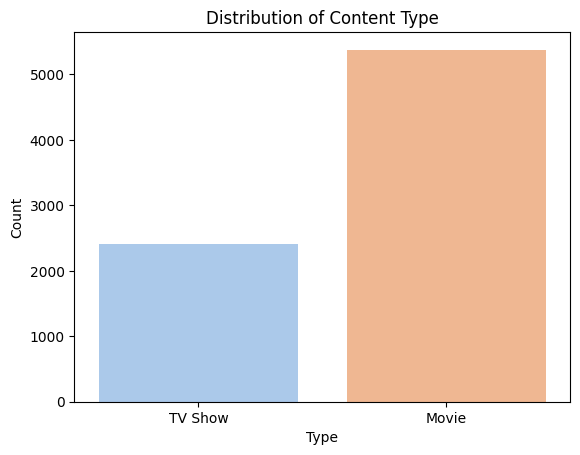

In [16]:
# Top Content Types (Movies vs TV Shows)

sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [17]:
# Remove leading/trailing spaces first
df['date_added'] = df['date_added'].str.strip()

# Now safely convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year


In [18]:
df['date_added'].isnull().sum()


np.int64(0)

C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\2013988223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='viridis')


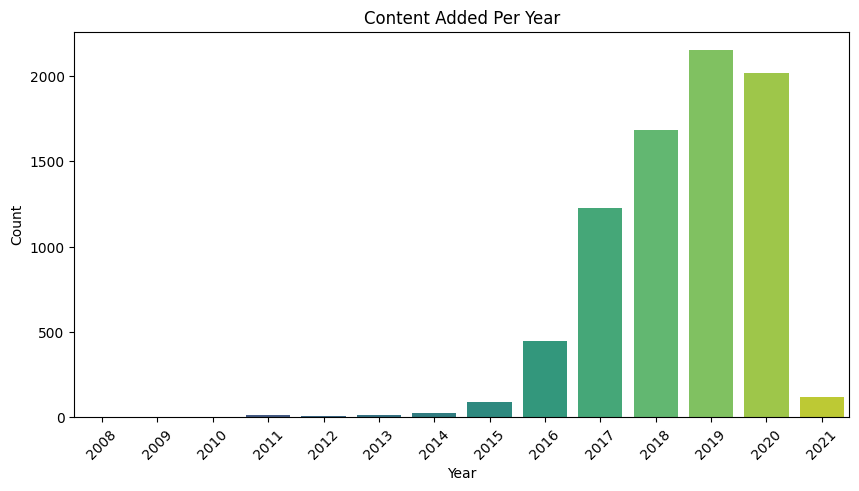

In [19]:
# Content Added Over Time (Year-wise Trend)

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='viridis')
plt.title('Content Added Per Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7332\2346584823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


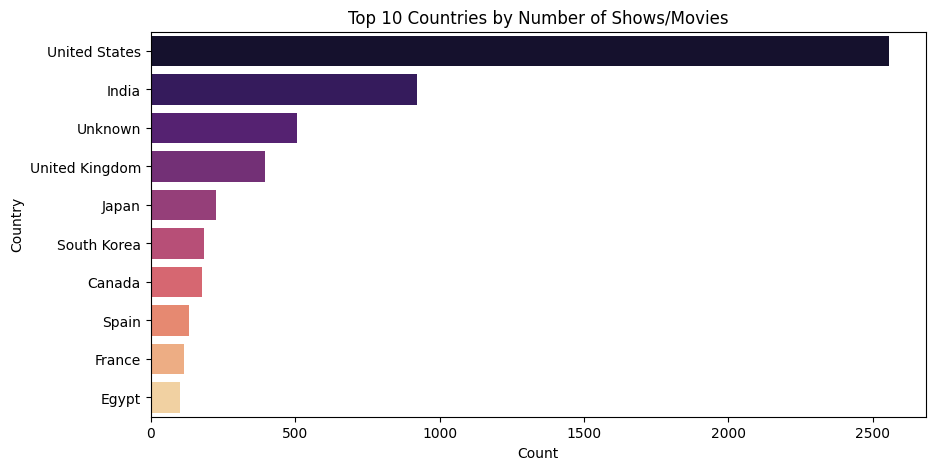

In [40]:
# Top 10 Countries with Most Content

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Shows/Movies')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\1657051967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


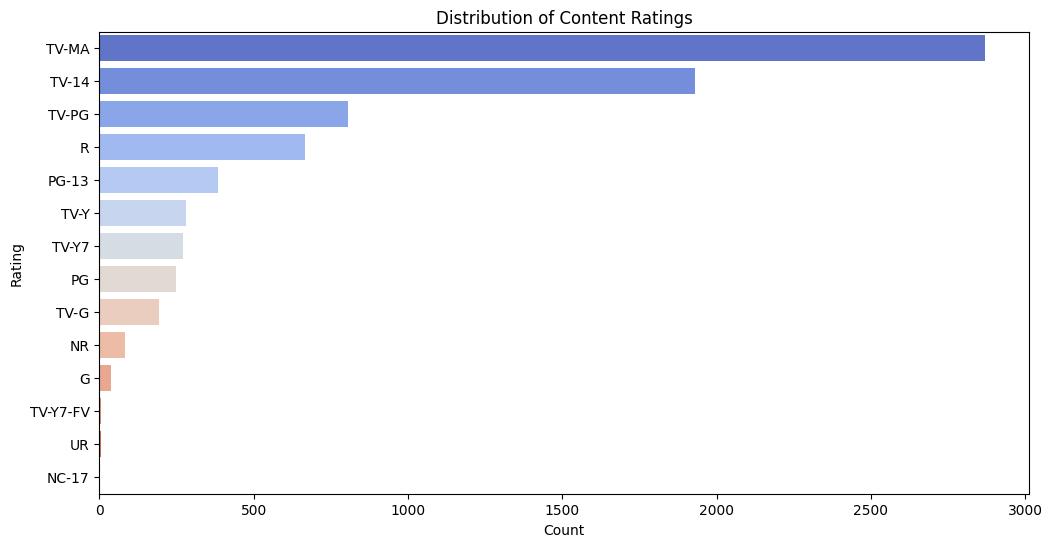

In [20]:
# Rating Distribution

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


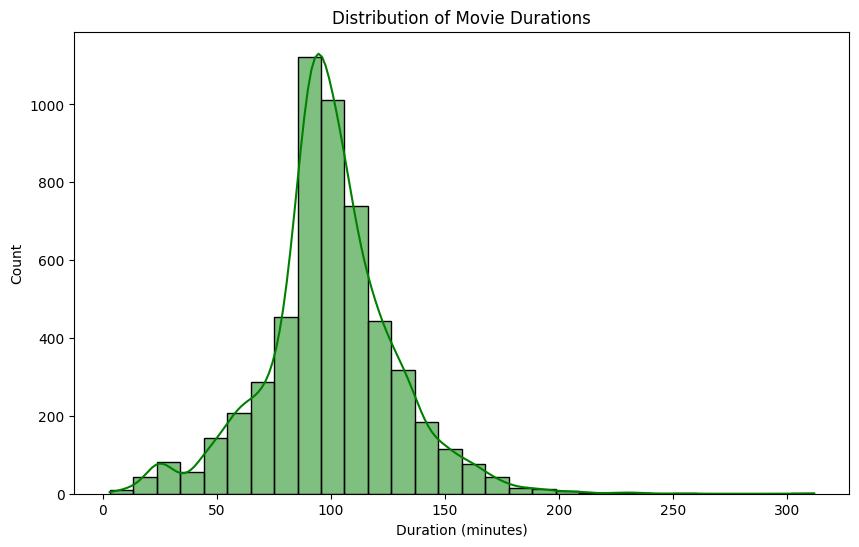

In [21]:
# Duration (Minutes) Distribution – Movies & TV Shows

plt.figure(figsize=(10,6))
sns.histplot(data=df[df['is_tv_show'] == 0], x='duration_minutes', bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\3785908947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_tv_show'] == 1], x='duration_int', palette='Set2')


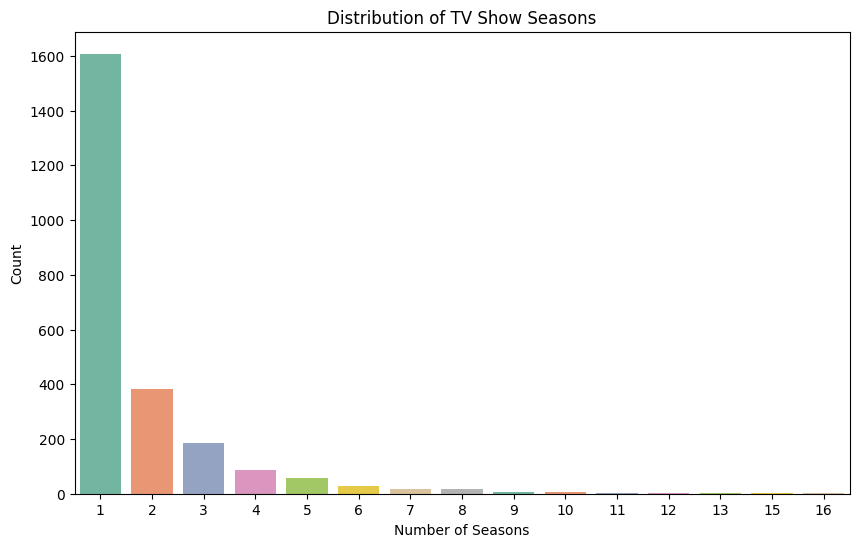

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['is_tv_show'] == 1], x='duration_int', palette='Set2')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\3305116266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='Spectral')


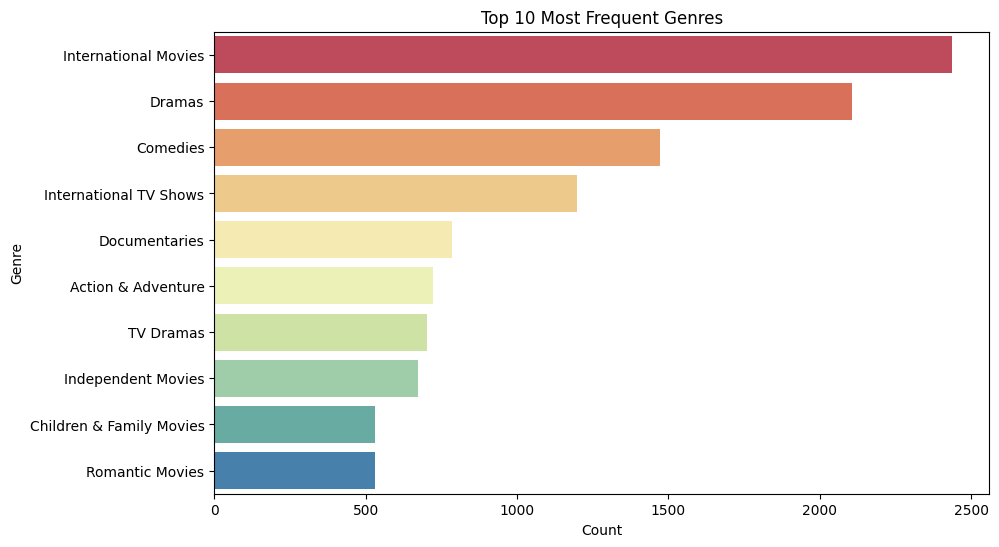

In [23]:
# Top 10 Genres (from listed_in)

from collections import Counter

all_genres = df['listed_in'].str.split(', ')
genre_list = [genre for sublist in all_genres for genre in sublist]
top_genres = Counter(genre_list).most_common(10)

genres, counts = zip(*top_genres)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(genres), palette='Spectral')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [24]:
# Convert Categorical Columns 

# One-hot encode 'type' and 'rating'
df_encoded = pd.get_dummies(df, columns=['type', 'rating'])

# For 'listed_in' (multiple genres in a single string), split and one-hot encode manually
df['listed_in'] = df['listed_in'].str.split(', ')
all_genres = set([genre for sublist in df['listed_in'] for genre in sublist])
for genre in all_genres:
    df[f'genre_{genre}'] = df['listed_in'].apply(lambda x: int(genre in x))

In [25]:
# Standardize Numerical Features (duration, release_year)
from sklearn.preprocessing import StandardScaler

# Create content_age
df['content_age'] = 2025 - df['release_year']

# Select numeric features to scale
num_cols = ['duration_int', 'release_year', 'content_age']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=[f'scaled_{col}' for col in num_cols])

In [26]:
# Extract Features from Text using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['description'].fillna(""))

# Convert to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [27]:
# Combined Feature Set
# Combine encoded, scaled, and tfidf features
df_final = pd.concat([df_encoded.reset_index(drop=True),
                      df_scaled.reset_index(drop=True),
                      df_tfidf.reset_index(drop=True)], axis=1)

# Feature Engineering:

In [28]:
# Genre Count

df['genre_count'] = df['listed_in'].apply(len)


In [29]:
df['genre_count']

0       3
1       2
2       2
3       3
4       1
       ..
7782    2
7783    3
7784    3
7785    2
7786    2
Name: genre_count, Length: 7787, dtype: int64

In [30]:
# Transform Categorical Variables for Clustering

# Select relevant columns for clustering
from pandas.api.types import is_numeric_dtype

# Filter all numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Combine scaled columns and genre one-hot encoded features
df_cluster = pd.concat([
    numeric_df[['genre_count']],
    df_scaled,          # scaled_duration_int, scaled_release_year, etc.
    df_encoded.filter(like='type_'),
    df_encoded.filter(like='rating_'),
    df.filter(like='genre_')  # genre_Dramas, genre_Comedies, etc.
], axis=1)


# Clustering Model Selection:

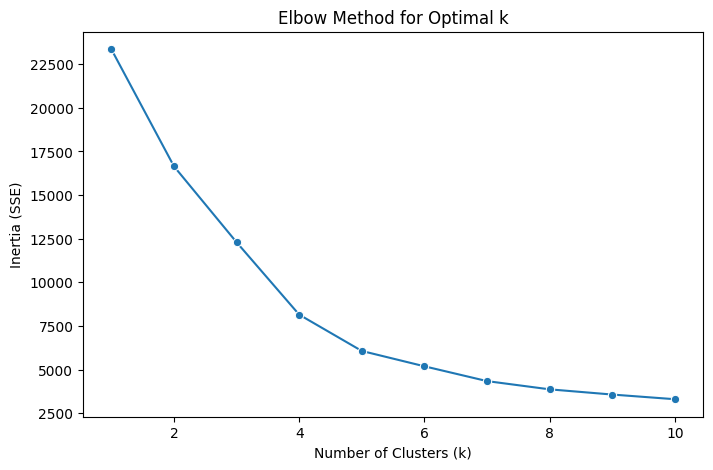

In [33]:
# K-Means Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['duration_int', 'content_age', 'genre_count']  

X = df[features]

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()



In [34]:

features_for_clustering = df[['content_age', 'duration_int', 'genre_count']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)



In [35]:
df['cluster']

0       1
1       2
2       2
3       0
4       2
       ..
7782    2
7783    0
7784    1
7785    1
7786    2
Name: cluster, Length: 7787, dtype: int32

In [52]:
# Check cluster distribution:
df['cluster'].value_counts()    # how many items fall into each cluster.


cluster
2    3012
1    2470
0    1901
3     404
Name: count, dtype: int64

In [53]:
# Add cluster labels to the DataFrame 

df['cluster'] = kmeans.labels_


In [54]:
df['cluster']

0       1
1       2
2       2
3       0
4       2
       ..
7782    2
7783    0
7784    1
7785    1
7786    2
Name: cluster, Length: 7787, dtype: int32

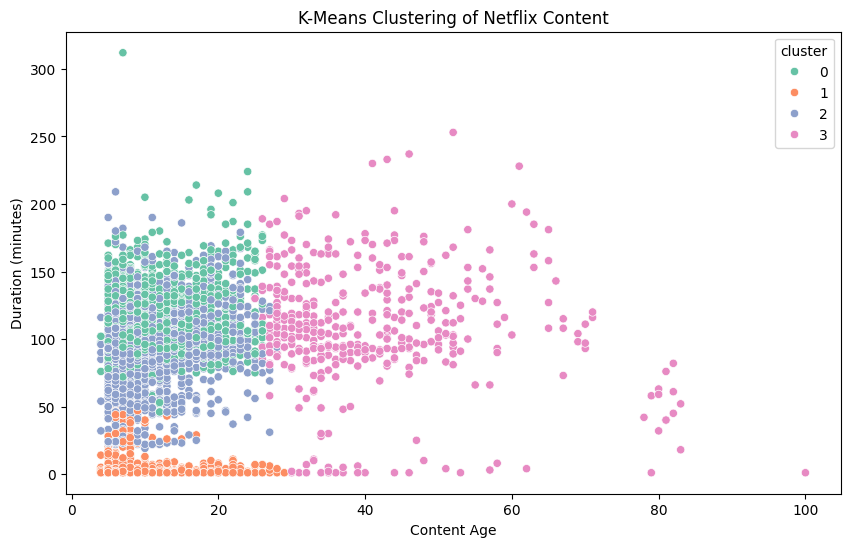

In [36]:
# Visualize Clusters (2D Scatter Plot):
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['content_age'],
    y=df['duration_int'],
    hue=df['cluster'],
    palette='Set2'
)
plt.title("K-Means Clustering of Netflix Content")
plt.xlabel("Content Age")
plt.ylabel("Duration (minutes)")
plt.show()

In [37]:
df.groupby('cluster')[['content_age', 'duration_int']].mean()


,content_age,duration_int
cluster,,
0,10.286165,110.942136
1,8.355061,2.812146
2,9.752988,92.037517
3,41.126238,106.918317


In [38]:
# Cluster Labeling:

def label_cluster(row):
    if row['cluster'] == 0:
        return 'Moderate Old Long Content'
    elif row['cluster'] == 1:
        return 'Modern Short Clips'
    elif row['cluster'] == 2:
        return 'Modern Medium Content'
    elif row['cluster'] == 3:
        return 'Retro Classics'

df['cluster_label'] = df.apply(label_cluster, axis=1)




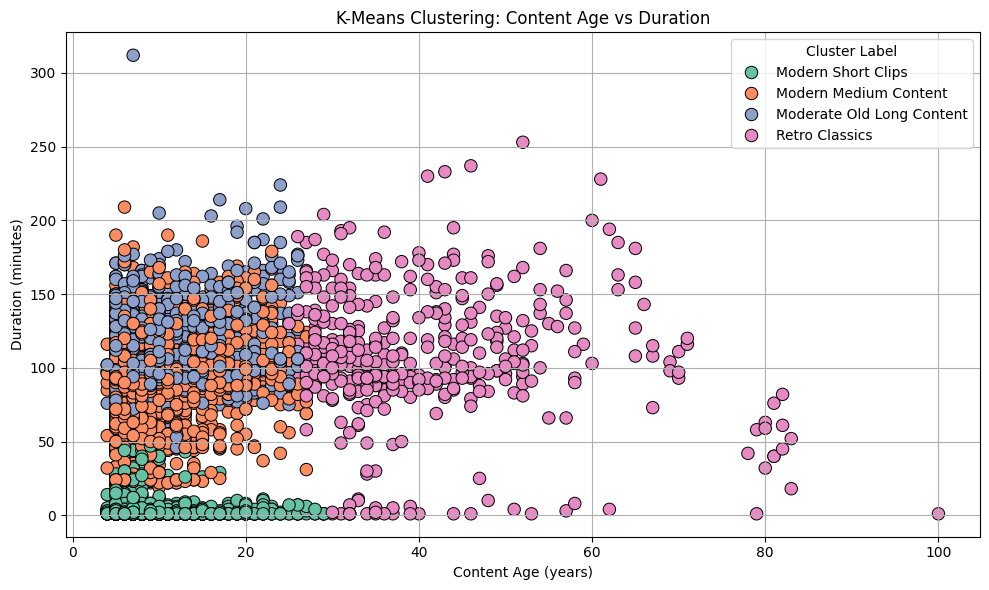

In [40]:
# Scatter Plot of Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='content_age',
    y='duration_int',
    hue='cluster_label',
    data=df,
    palette='Set2',
    s=80,
    edgecolor='black'
)
plt.title('K-Means Clustering: Content Age vs Duration')
plt.xlabel('Content Age (years)')
plt.ylabel('Duration (minutes)')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()


# Hierarchical Clustering

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage


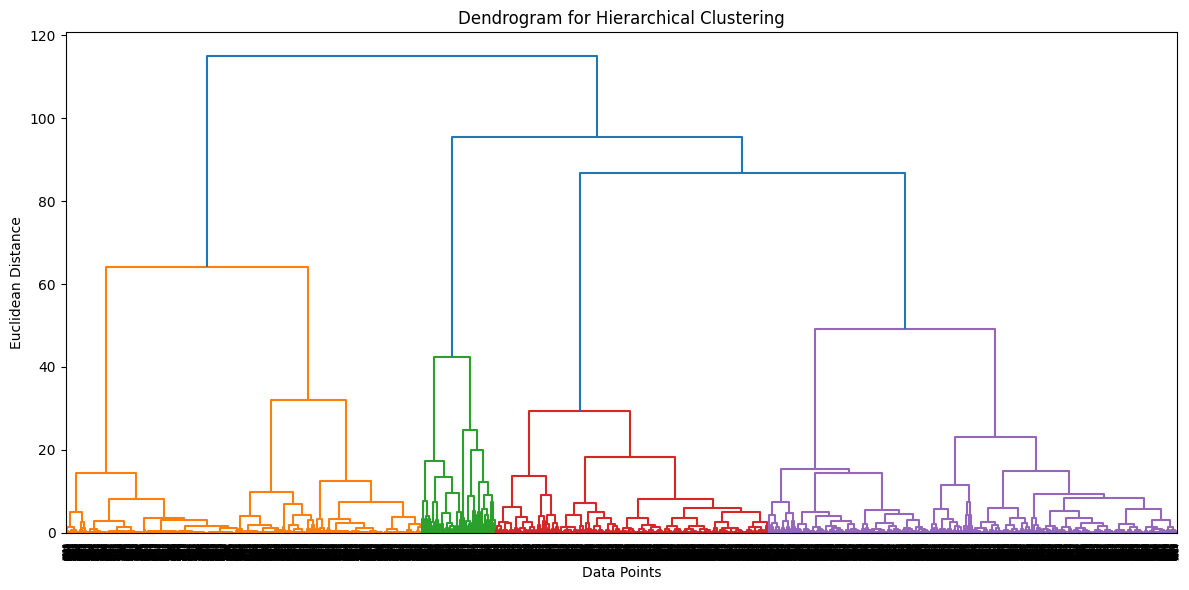

In [44]:
# Step 1: Linkage matrix
linked = linkage(scaled_features, method='ward')

# Step 2: Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


In [45]:
# Fit Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


In [47]:
# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['hc_cluster'] = hc.fit_predict(scaled_features)



In [48]:
# Analyze the Clusters

df.groupby('hc_cluster')[['content_age', 'duration_int']].mean()


,content_age,duration_int
hc_cluster,,
0,8.194556,3.048839
1,9.314356,93.525672
2,37.182879,99.007782
3,10.425209,110.872908


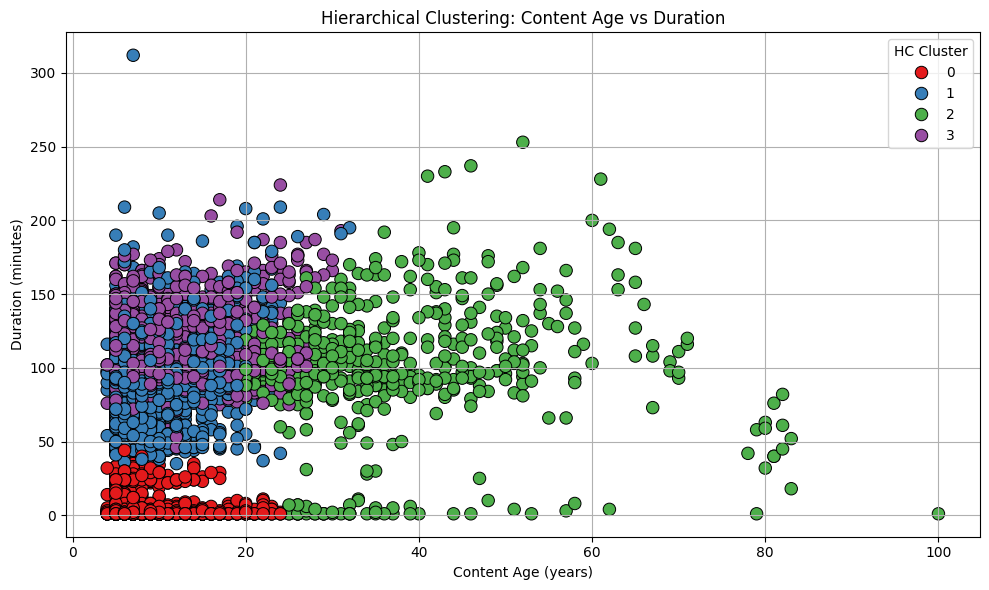

In [49]:
# Visualize Hierarchical Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='content_age',
    y='duration_int',
    hue='hc_cluster',
    data=df,
    palette='Set1',
    s=80,
    edgecolor='black'
)
plt.title('Hierarchical Clustering: Content Age vs Duration')
plt.xlabel('Content Age (years)')
plt.ylabel('Duration (minutes)')
plt.legend(title='HC Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Step: Define label function for hc_cluster
def label_hc_cluster(row):
    if row['hc_cluster'] == 0:
        return 'Modern Short Clips'
    elif row['hc_cluster'] == 1:
        return 'Modern Medium Content'
    elif row['hc_cluster'] == 2:
        return 'Retro Classics'
    elif row['hc_cluster'] == 3:
        return 'Moderate Old Long Content'

# Apply labeling
df['hc_cluster_label'] = df.apply(label_hc_cluster, axis=1)


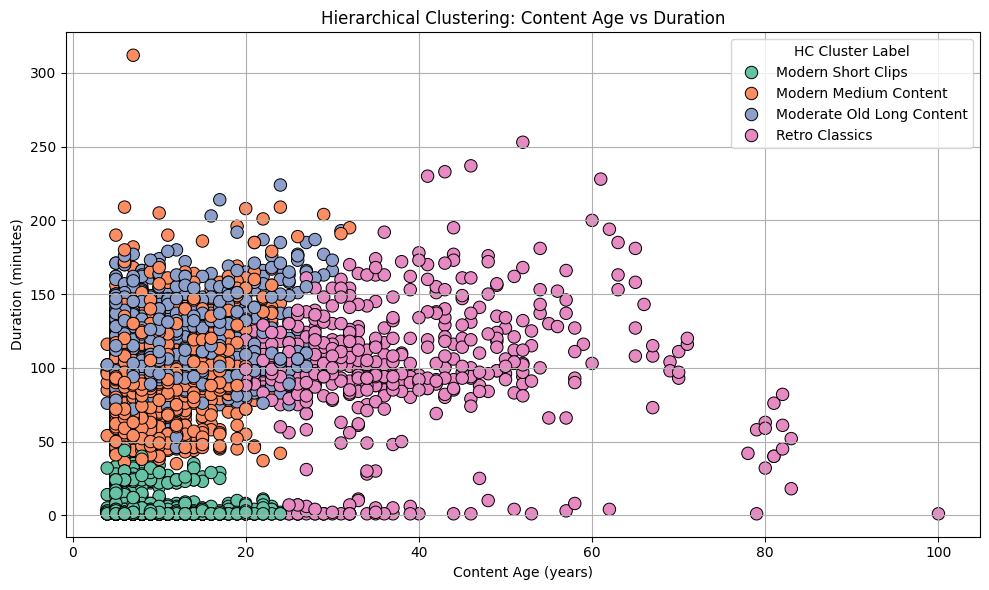

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='content_age',
    y='duration_int',
    hue='hc_cluster_label',
    data=df,
    palette='Set2',
    s=80,
    edgecolor='black'
)
plt.title('Hierarchical Clustering: Content Age vs Duration')
plt.xlabel('Content Age (years)')
plt.ylabel('Duration (minutes)')
plt.legend(title='HC Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()


# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN


In [53]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['dbscan_label'] = dbscan.fit_predict(scaled_features)


In [54]:
# Number of clusters (excluding noise)
n_clusters = len(set(df['dbscan_label'])) - (1 if -1 in df['dbscan_label'].values else 0)
n_noise = list(df['dbscan_label']).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


Number of clusters: 4
Number of noise points: 29


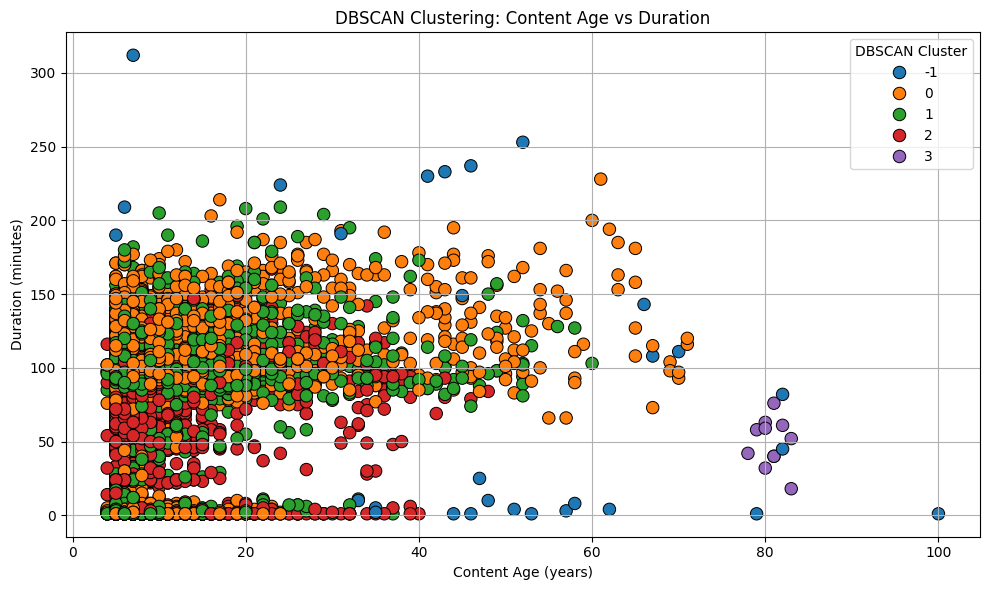

In [55]:
# Visualize DBSCAN Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='content_age',
    y='duration_int',
    hue='dbscan_label',
    data=df,
    palette='tab10',
    s=80,
    edgecolor='black'
)
plt.title('DBSCAN Clustering: Content Age vs Duration')
plt.xlabel('Content Age (years)')
plt.ylabel('Duration (minutes)')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
def label_dbscan(row):
    if row['dbscan_label'] == -1:
        return 'Noise/Outlier'
    elif row['dbscan_label'] == 0:
        return 'Cluster 0'
    elif row['dbscan_label'] == 1:
        return 'Cluster 1'
    elif row['dbscan_label'] == 2:
        return 'Cluster 2'
    elif row['dbscan_label'] == 3:
        return 'Cluster 3'

df['dbscan_cluster_label'] = df.apply(label_dbscan, axis=1)

In [58]:
df['dbscan_cluster_label']

0       Cluster 0
1       Cluster 1
2       Cluster 1
3       Cluster 0
4       Cluster 2
          ...    
7782    Cluster 1
7783    Cluster 0
7784    Cluster 0
7785    Cluster 1
7786    Cluster 1
Name: dbscan_cluster_label, Length: 7787, dtype: object

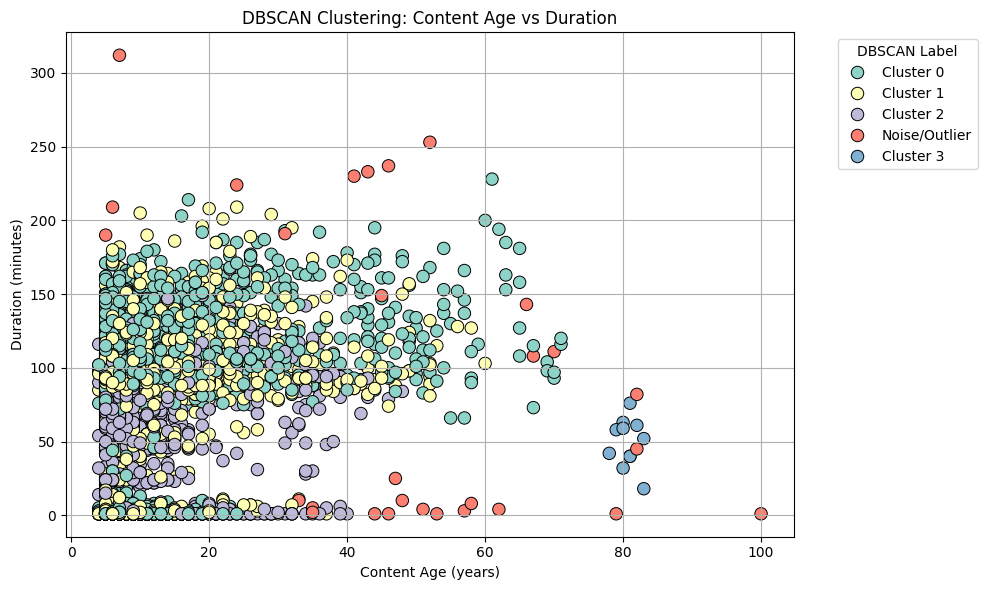

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='content_age',
    y='duration_int',
    hue='dbscan_cluster_label',
    data=df,
    palette='Set3',
    s=80,
    edgecolor='black'
)
plt.title('DBSCAN Clustering: Content Age vs Duration')
plt.xlabel('Content Age (years)')
plt.ylabel('Duration (minutes)')
plt.legend(title='DBSCAN Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Cluster Interpretation using Genre & Rating


In [70]:
# KMeans cluster analysis:

genre_cols = [col for col in df.columns if col.startswith('genre_')]

# Function to rebuild list of genres from 1s
def extract_genres(row):
    return [col.replace('genre_', '') for col in genre_cols if row[col] == 1]

# Apply to dataset
df['genre_split'] = df.apply(extract_genres, axis=1)



In [72]:

df_genre = df.explode('genre_split')

# Count top genres per KMeans cluster
genre_counts = (
    df_genre.groupby(['cluster_label', 'genre_split'])
    .size()
    .reset_index(name='count')
)

# Top 3 genres per cluster
top_genres_kmeans = genre_counts.sort_values(['cluster_label', 'count'], ascending=[True, False])
top_genres_kmeans = top_genres_kmeans.groupby('cluster_label').head(3)



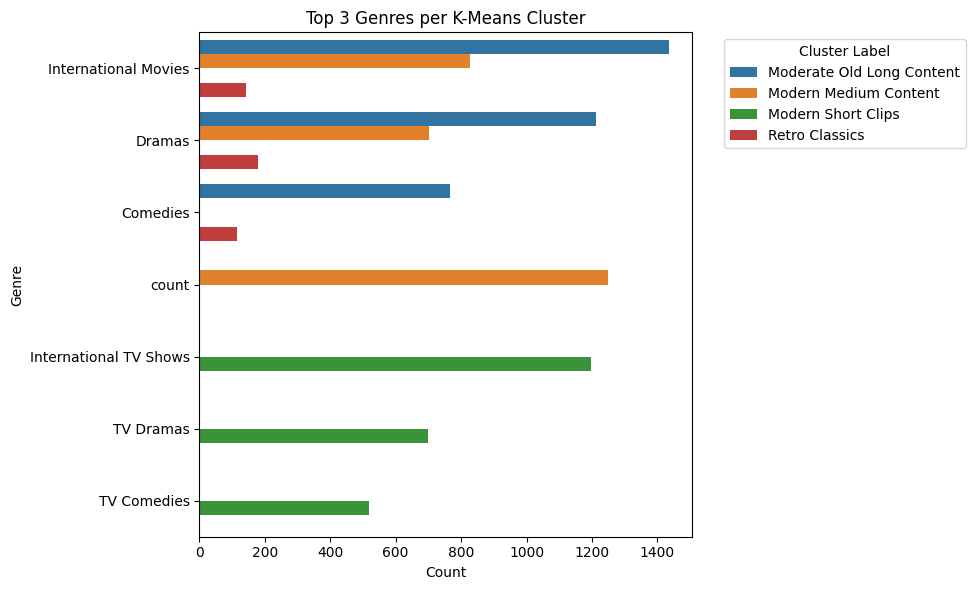

In [73]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_kmeans, x='count', y='genre_split', hue='cluster_label')
plt.title('Top 3 Genres per K-Means Cluster')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


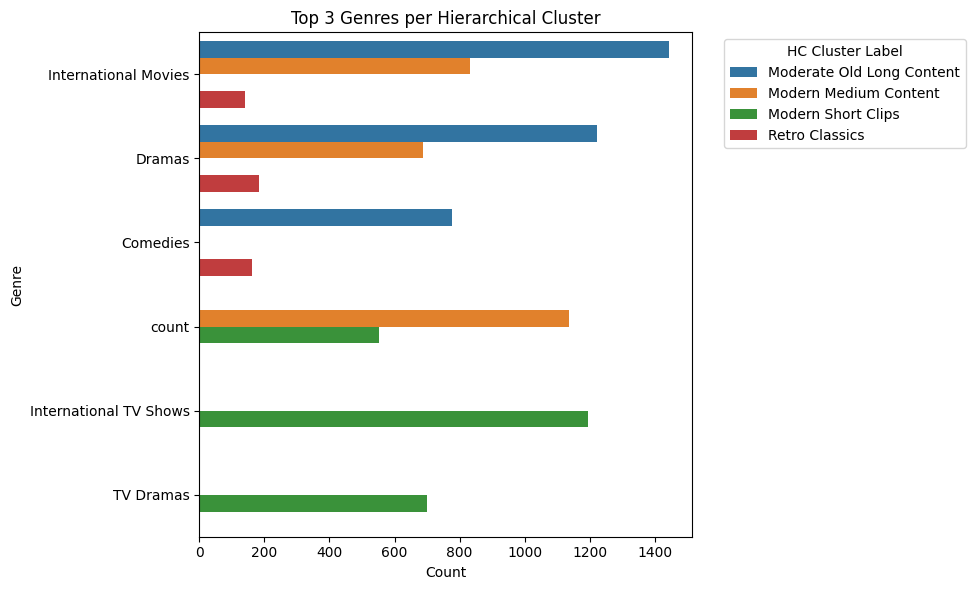

In [74]:
# Count top genres per Hierarchical cluster
genre_counts_hc = (
    df_genre.groupby(['hc_cluster_label', 'genre_split'])
    .size()
    .reset_index(name='count')
)

# Get top 3 genres per HC cluster
top_genres_hc = genre_counts_hc.sort_values(['hc_cluster_label', 'count'], ascending=[True, False])
top_genres_hc = top_genres_hc.groupby('hc_cluster_label').head(3)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_hc, x='count', y='genre_split', hue='hc_cluster_label')
plt.title('Top 3 Genres per Hierarchical Cluster')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='HC Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


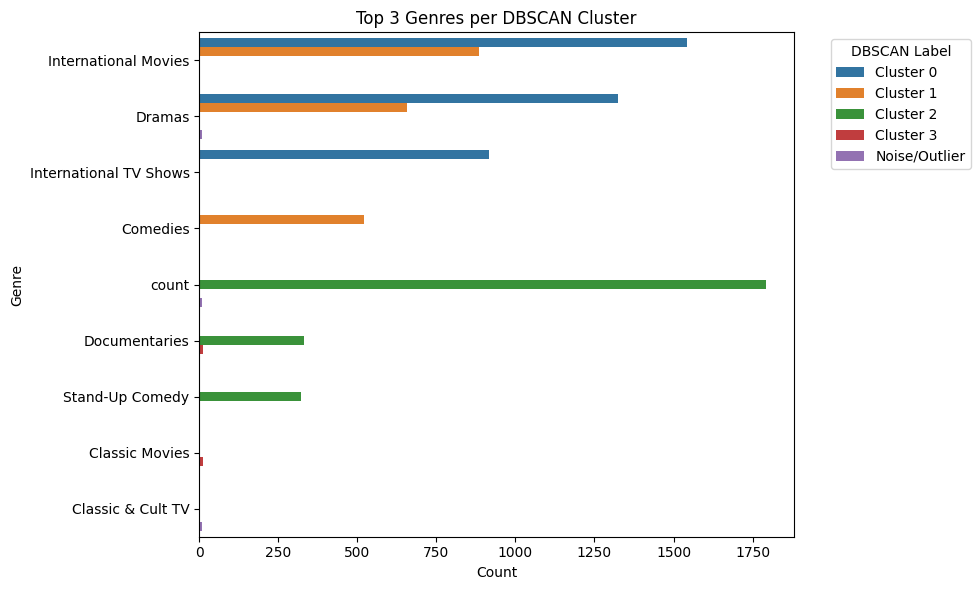

In [75]:
# Count top genres per DBSCAN cluster
genre_counts_dbscan = (
    df_genre.groupby(['dbscan_cluster_label', 'genre_split'])
    .size()
    .reset_index(name='count')
)

# Top 3 genres per DBSCAN cluster (excluding noise if you want)
top_genres_dbscan = genre_counts_dbscan.sort_values(['dbscan_cluster_label', 'count'], ascending=[True, False])
top_genres_dbscan = top_genres_dbscan.groupby('dbscan_cluster_label').head(3)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_dbscan, x='count', y='genre_split', hue='dbscan_cluster_label')
plt.title('Top 3 Genres per DBSCAN Cluster')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='DBSCAN Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Rating Heatmaps


C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\2093740196.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhuvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


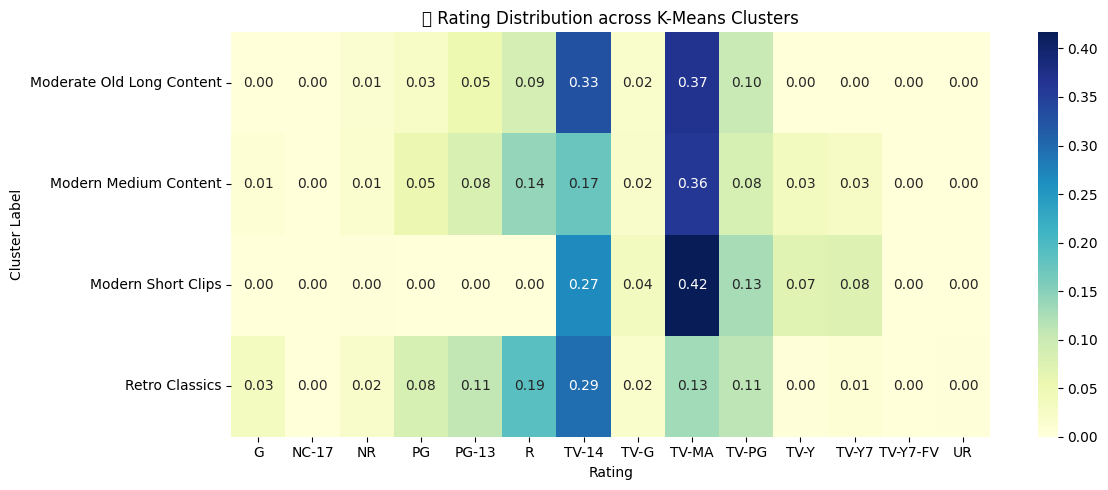

In [76]:
# K-Means Rating Heatmap

# Create normalized rating distribution table
rating_dist = df.groupby('cluster_label')['rating'].value_counts(normalize=True).unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 5))
sns.heatmap(rating_dist, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('📊 Rating Distribution across K-Means Clusters')
plt.xlabel('Rating')
plt.ylabel('Cluster Label')
plt.tight_layout()
plt.show()

C:\Users\bhuvi\AppData\Local\Temp\ipykernel_7648\2950464154.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bhuvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


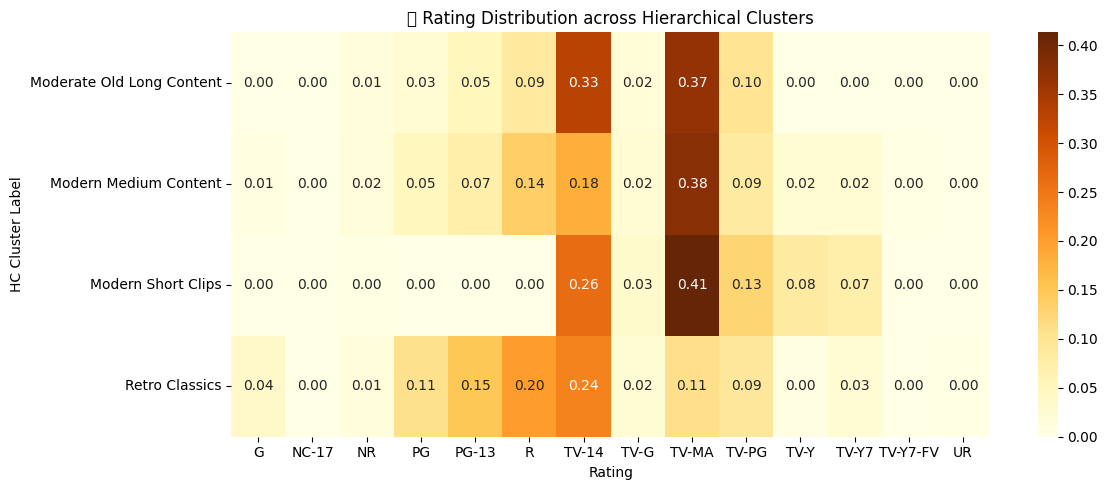

In [77]:
# Hierarchical Clustering Rating Heatmap

rating_dist_hc = df.groupby('hc_cluster_label')['rating'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 5))
sns.heatmap(rating_dist_hc, annot=True, fmt=".2f", cmap='YlOrBr')
plt.title(' Rating Distribution across Hierarchical Clusters')
plt.xlabel('Rating')
plt.ylabel('HC Cluster Label')
plt.tight_layout()
plt.show()


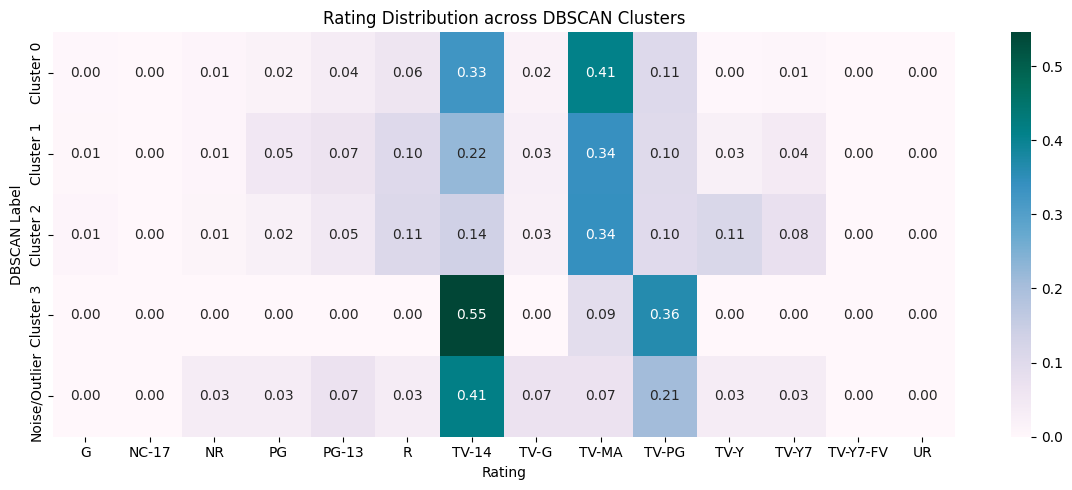

In [78]:
# DBSCAN Rating Heatmap

rating_dist_dbscan = df.groupby('dbscan_cluster_label')['rating'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 5))
sns.heatmap(rating_dist_dbscan, annot=True, fmt=".2f", cmap='PuBuGn')
plt.title('Rating Distribution across DBSCAN Clusters')
plt.xlabel('Rating')
plt.ylabel('DBSCAN Label')
plt.tight_layout()
plt.show()


In [79]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Evaluate Each Clustering Model

# K-Means Clustering


In [80]:
# Silhouette Score
score_kmeans = silhouette_score(scaled_features, df['cluster'])

# Davies-Bouldin Index
db_kmeans = davies_bouldin_score(scaled_features, df['cluster'])

# Inertia (from KMeans model)
inertia_kmeans = kmeans.inertia_  # Assuming you still have the kmeans object

print(f"K-Means: Silhouette = {score_kmeans:.4f}, Davies-Bouldin = {db_kmeans:.4f}, Inertia = {inertia_kmeans:.2f}")


K-Means: Silhouette = 0.4280, Davies-Bouldin = 0.8591, Inertia = 8148.19


# Hierarchical Clustering


In [81]:
score_hc = silhouette_score(scaled_features, df['hc_cluster'])
db_hc = davies_bouldin_score(scaled_features, df['hc_cluster'])

print(f"Hierarchical: Silhouette = {score_hc:.4f}, Davies-Bouldin = {db_hc:.4f}")


Hierarchical: Silhouette = 0.4250, Davies-Bouldin = 0.8756


# DBSCAN 

In [82]:
dbscan_mask = df['dbscan_label'] != -1
score_dbscan = silhouette_score(scaled_features[dbscan_mask], df.loc[dbscan_mask, 'dbscan_label'])
db_dbscan = davies_bouldin_score(scaled_features[dbscan_mask], df.loc[dbscan_mask, 'dbscan_label'])

print(f"DBSCAN: Silhouette = {score_dbscan:.4f}, Davies-Bouldin = {db_dbscan:.4f}")


DBSCAN: Silhouette = 0.2724, Davies-Bouldin = 1.3580


# Visualizing Clusters with t-SNE


In [83]:
from sklearn.manifold import TSNE

# Fit t-SNE (2 components for 2D)
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Add to DataFrame
df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

C:\Users\bhuvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


# Plot t-SNE with KMeans Cluster Labels

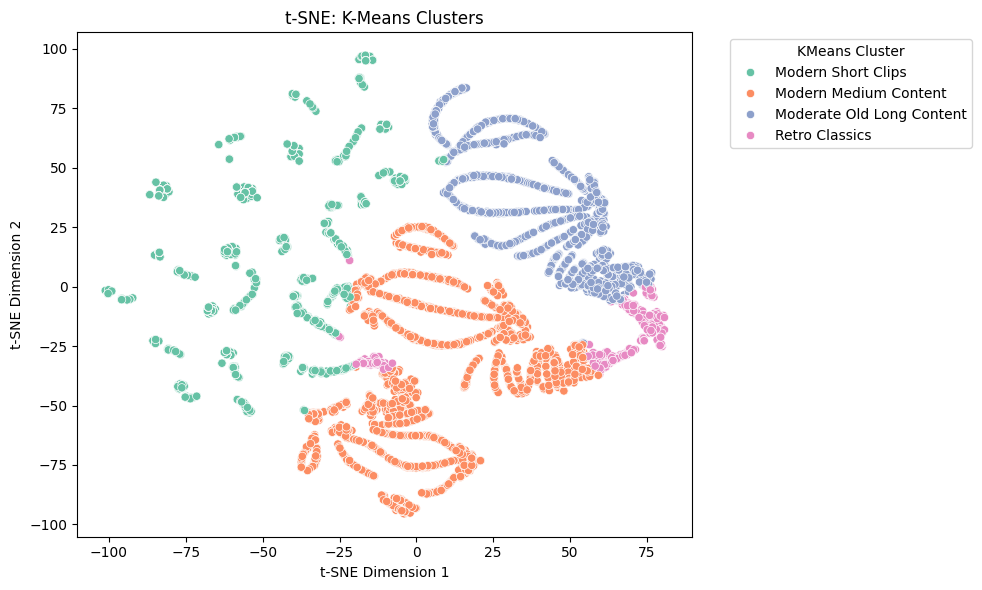

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster_label', palette='Set2')
plt.title('t-SNE: K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='KMeans Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Plot t-SNE with Hierarchical Cluster Labels

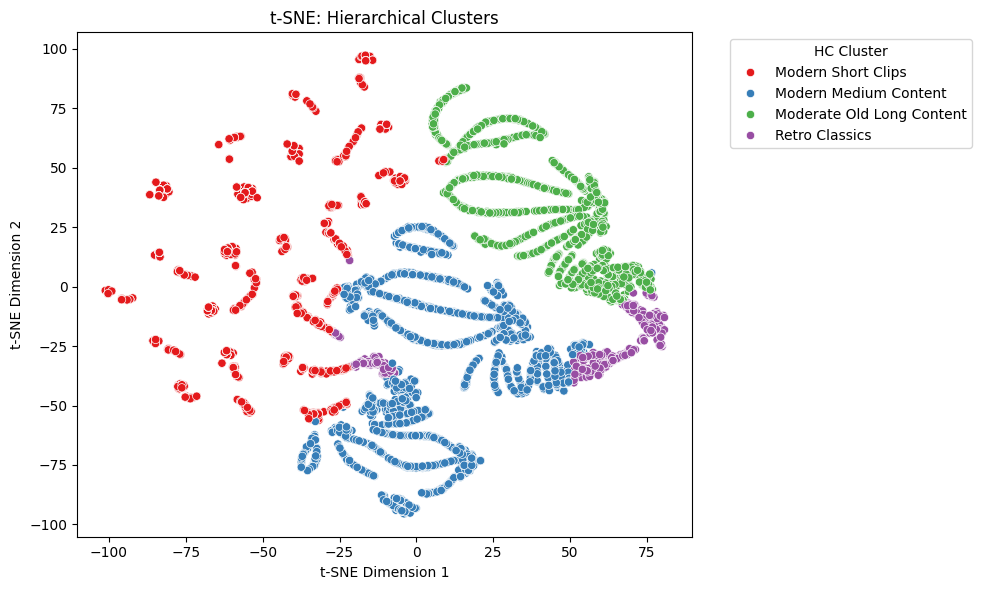

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='hc_cluster_label', palette='Set1')
plt.title('t-SNE: Hierarchical Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='HC Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# DBSCAN Cluster Plot


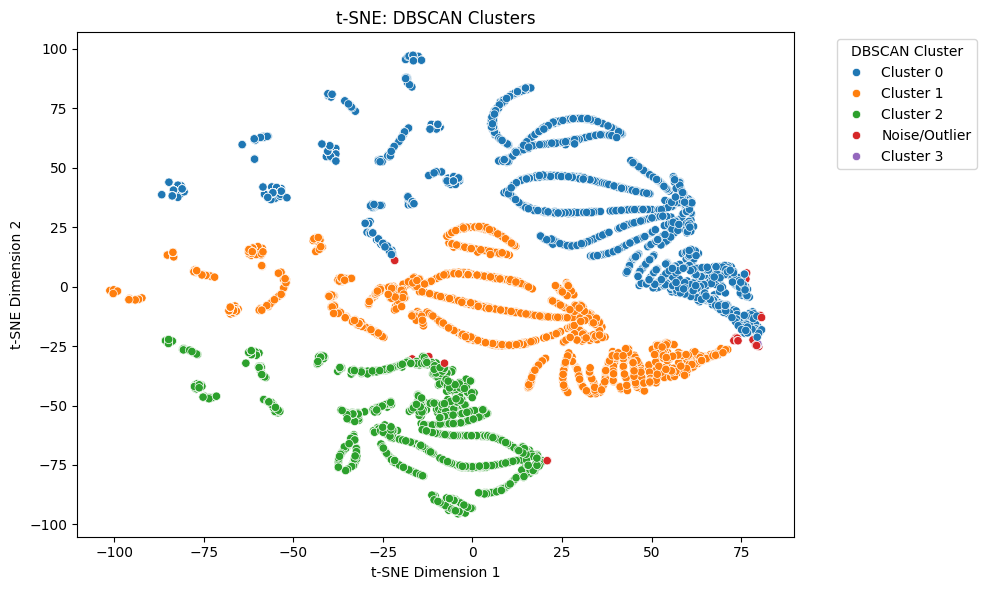

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='dbscan_cluster_label', palette='tab10')
plt.title('t-SNE: DBSCAN Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
